In [2]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
!kaggle datasets download -d uciml/iris
# Download the Iris dataset from Kaggle

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
iris.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile

with zipfile.ZipFile("iris.zip", "r") as zip_ref:
    zip_ref.extractall("iris_data")


In [5]:
data = pd.read_csv("F:\InternShip\Ensemble Learning\Voting-Ensemble\iris_data\Iris.csv")

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data = data.drop(columns=['Id'])

In [8]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Species'] = encoder.fit_transform(data['Species'])

In [10]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


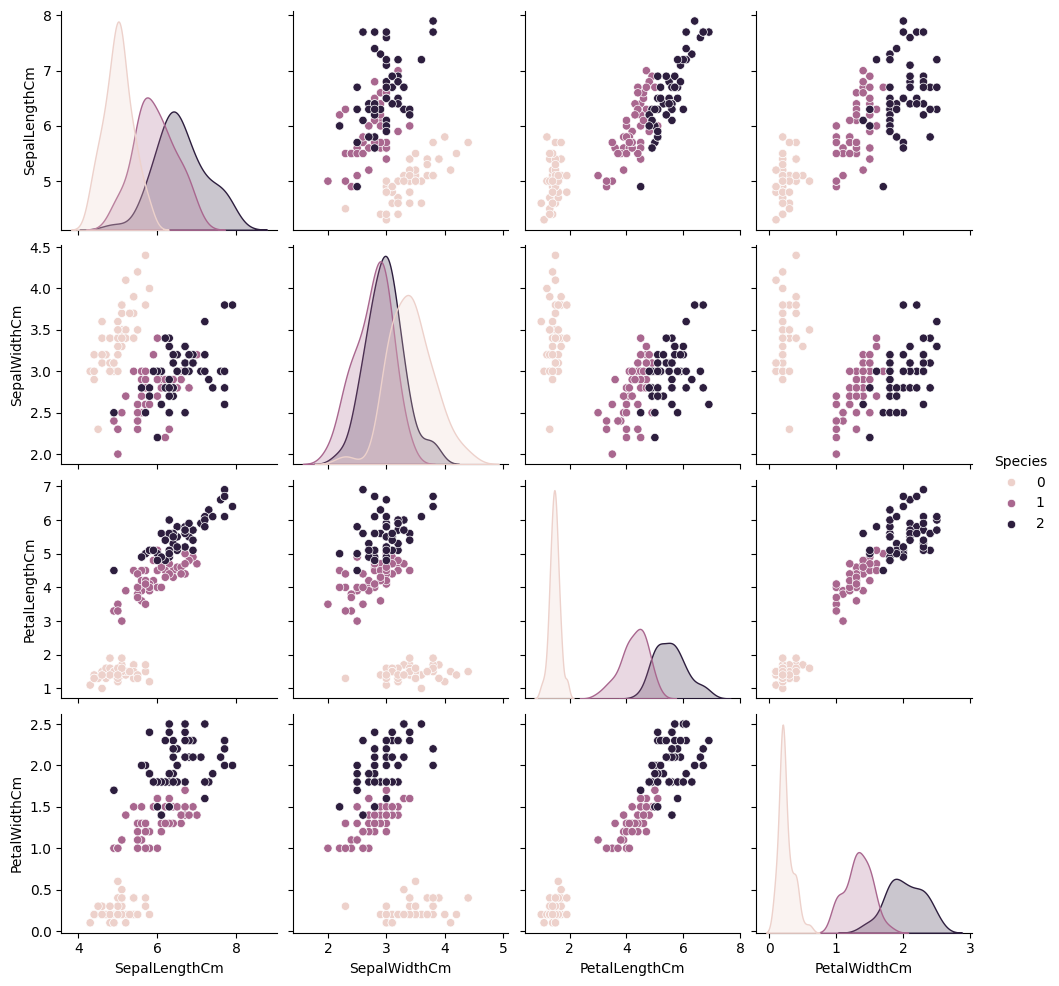

In [11]:
import seaborn as sns
sns.pairplot(data, hue= 'Species')

In [12]:
new_data = data[data['Species'] != 0][['SepalLengthCm', 'SepalWidthCm', 'Species']]

In [13]:
new_data.head()

,SepalLengthCm,SepalWidthCm,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [14]:
new_data.shape

(100, 3)

In [ ]:
X = data.iloc[:,0:2]
y = data.iloc[:,-1]

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [25]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [26]:
estimators = [('lr', clf1), ('rf', clf2), ('knn', clf3)]

In [28]:
for estimator in estimators:
    x = cross_val_score(estimator[1], X, y, cv=10, scoring='accuracy')
    print(estimator[0], np.round(np.mean(x), 2))

lr 0.81
rf 0.72
knn 0.76


In [29]:
from sklearn.ensemble import VotingClassifier

Hard Voting

In [30]:
vc = VotingClassifier(estimators = estimators, voting='hard')
x = cross_val_score(vc, X, y, cv=10, scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


Soft Voting

In [31]:
vc1 = VotingClassifier(estimators = estimators, voting='soft')
x1 = cross_val_score(vc1, X, y, cv=10, scoring='accuracy')
print(np.round(np.mean(x1),2))

0.76


Classifiers of Same Algo

In [32]:
from sklearn.svm import SVC

In [33]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [34]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
